In [295]:
%matplotlib inline

In [296]:
import numpy as np  
from sklearn.linear_model import LinearRegression
import pandas as pd 
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns

In [365]:
data = pd.read_csv(r"C:\Users\Muthu B\Downloads\Holiday_Package-1.csv")

In [366]:
data.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [374]:
data = data.drop('Unnamed: 0', axis=1)

In [375]:
data.shape

(872, 7)

In [376]:
data.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [378]:
data.dtypes.value_counts()

int64     5
object    2
dtype: int64

In [379]:
data.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [380]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data[dups]

Number of duplicate rows = 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


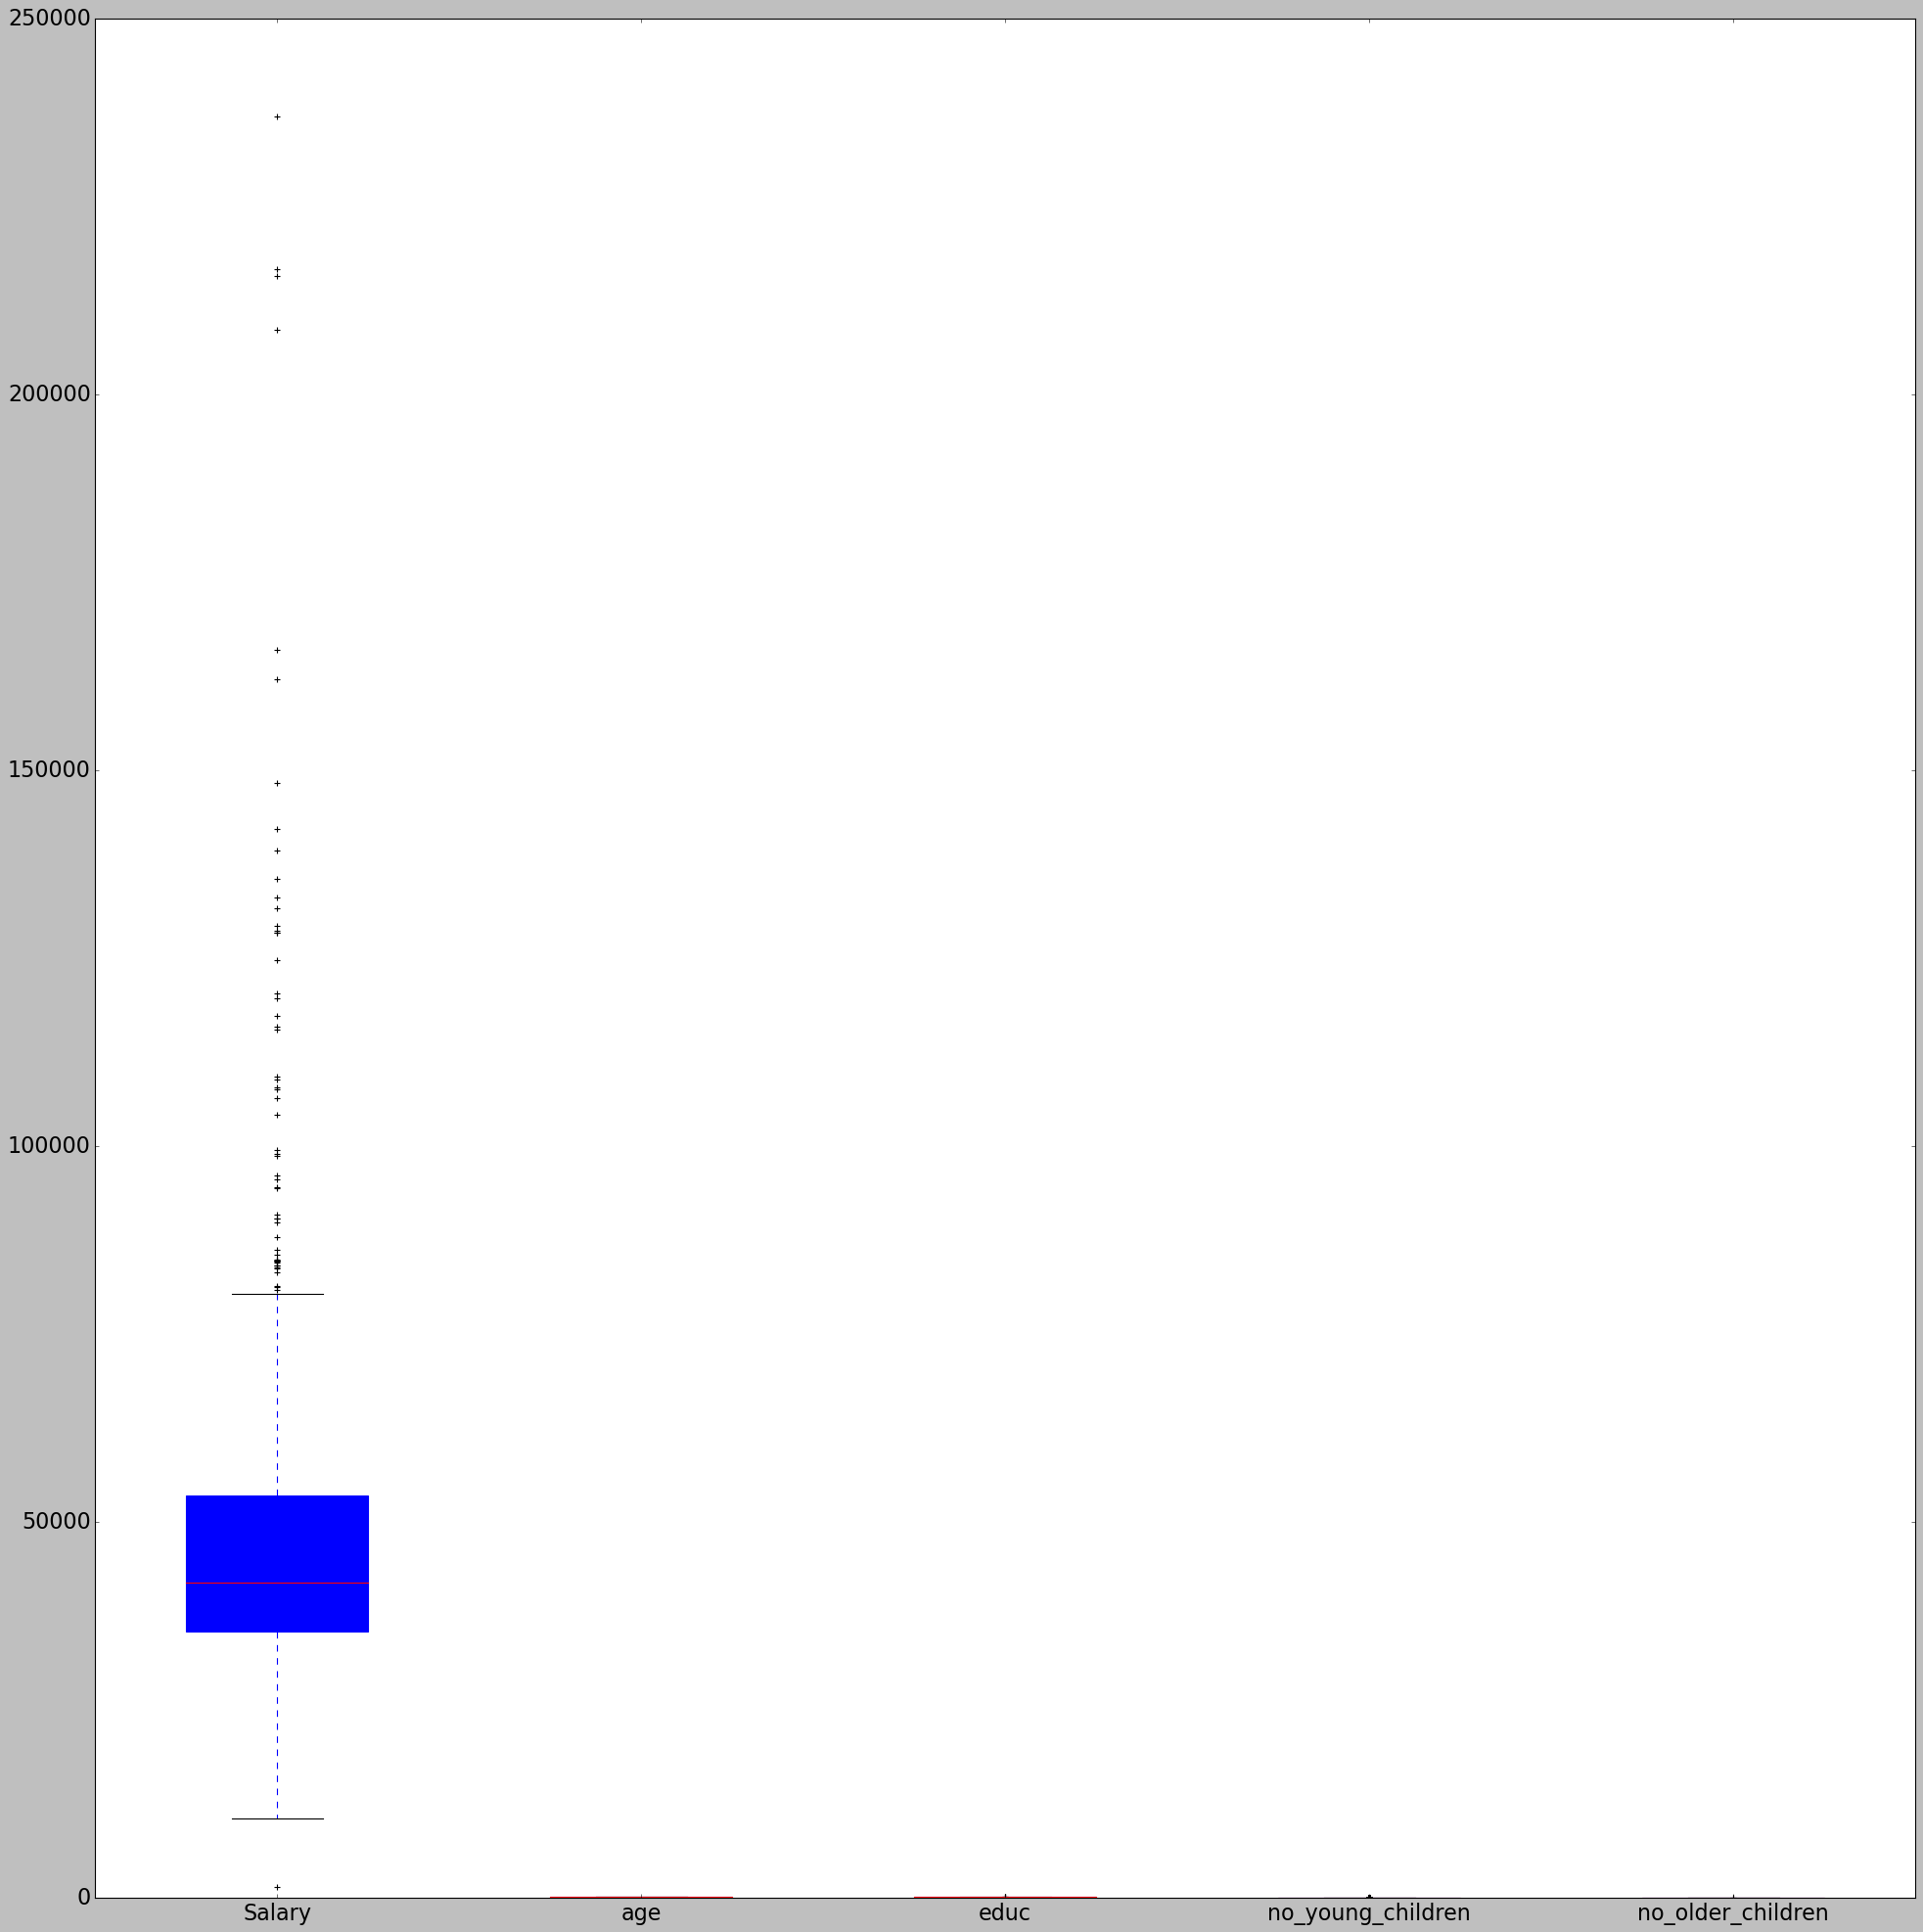

In [381]:
data.plot(kind='box', figsize = (30,30), fontsize=20, patch_artist=True)

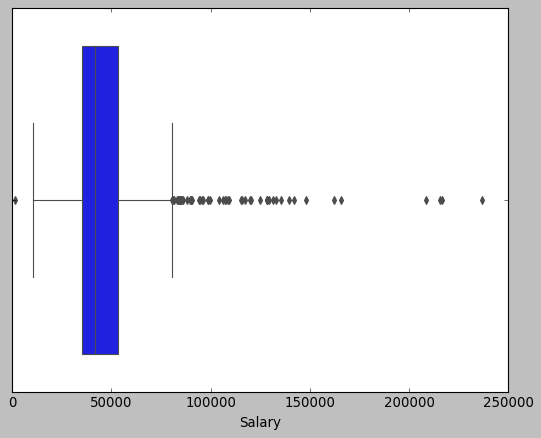

In [382]:
sns.boxplot(x='Salary', data=data)

In [387]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        data[feature] = pd.Categorical(data[feature]).codes

In [388]:
data

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0
...,...,...,...,...,...,...,...
867,0,40030,24,4,2,1,1
868,1,32137,48,8,0,0,1
869,0,25178,24,6,2,0,1
870,1,55958,41,10,0,1,1


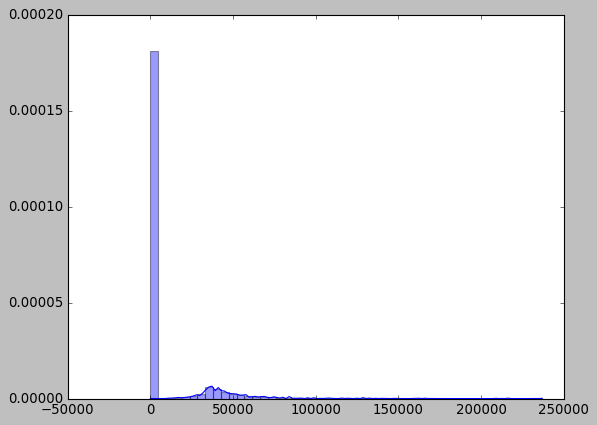

In [385]:
sns.distplot(data);

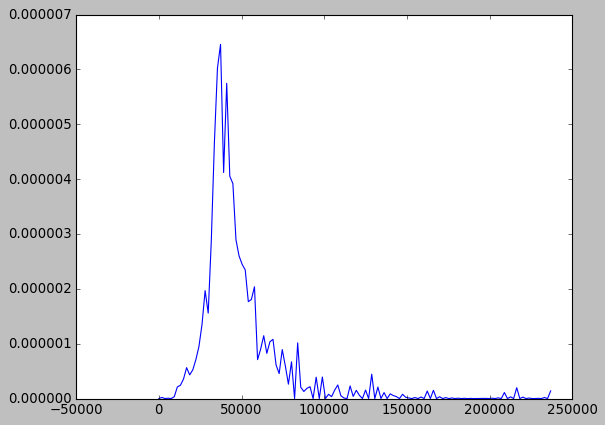

In [390]:
sns.distplot(data, hist=False);

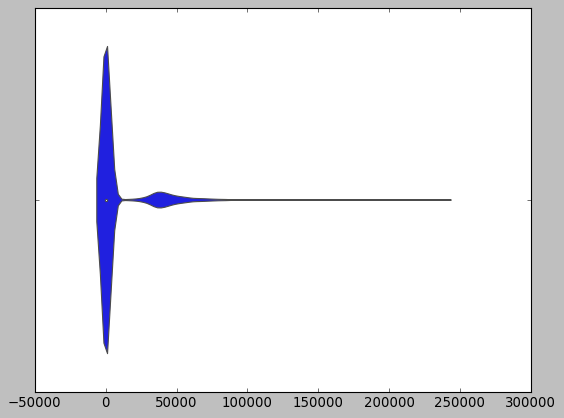

In [391]:
sns.violinplot(data)

C:\Users\Muthu B\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:177: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  probs = [integrate.quad(func, support[i - 1], support[i],


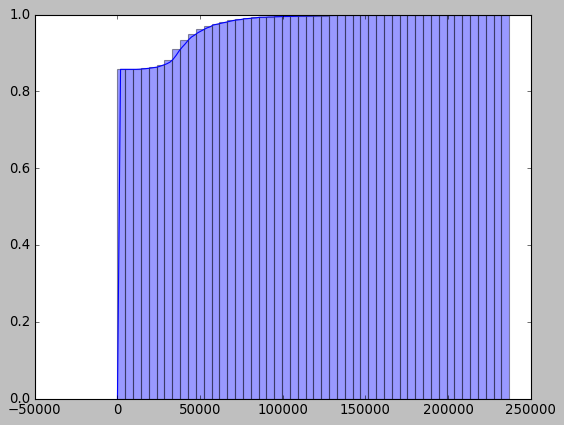

In [392]:
sns.distplot(data, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

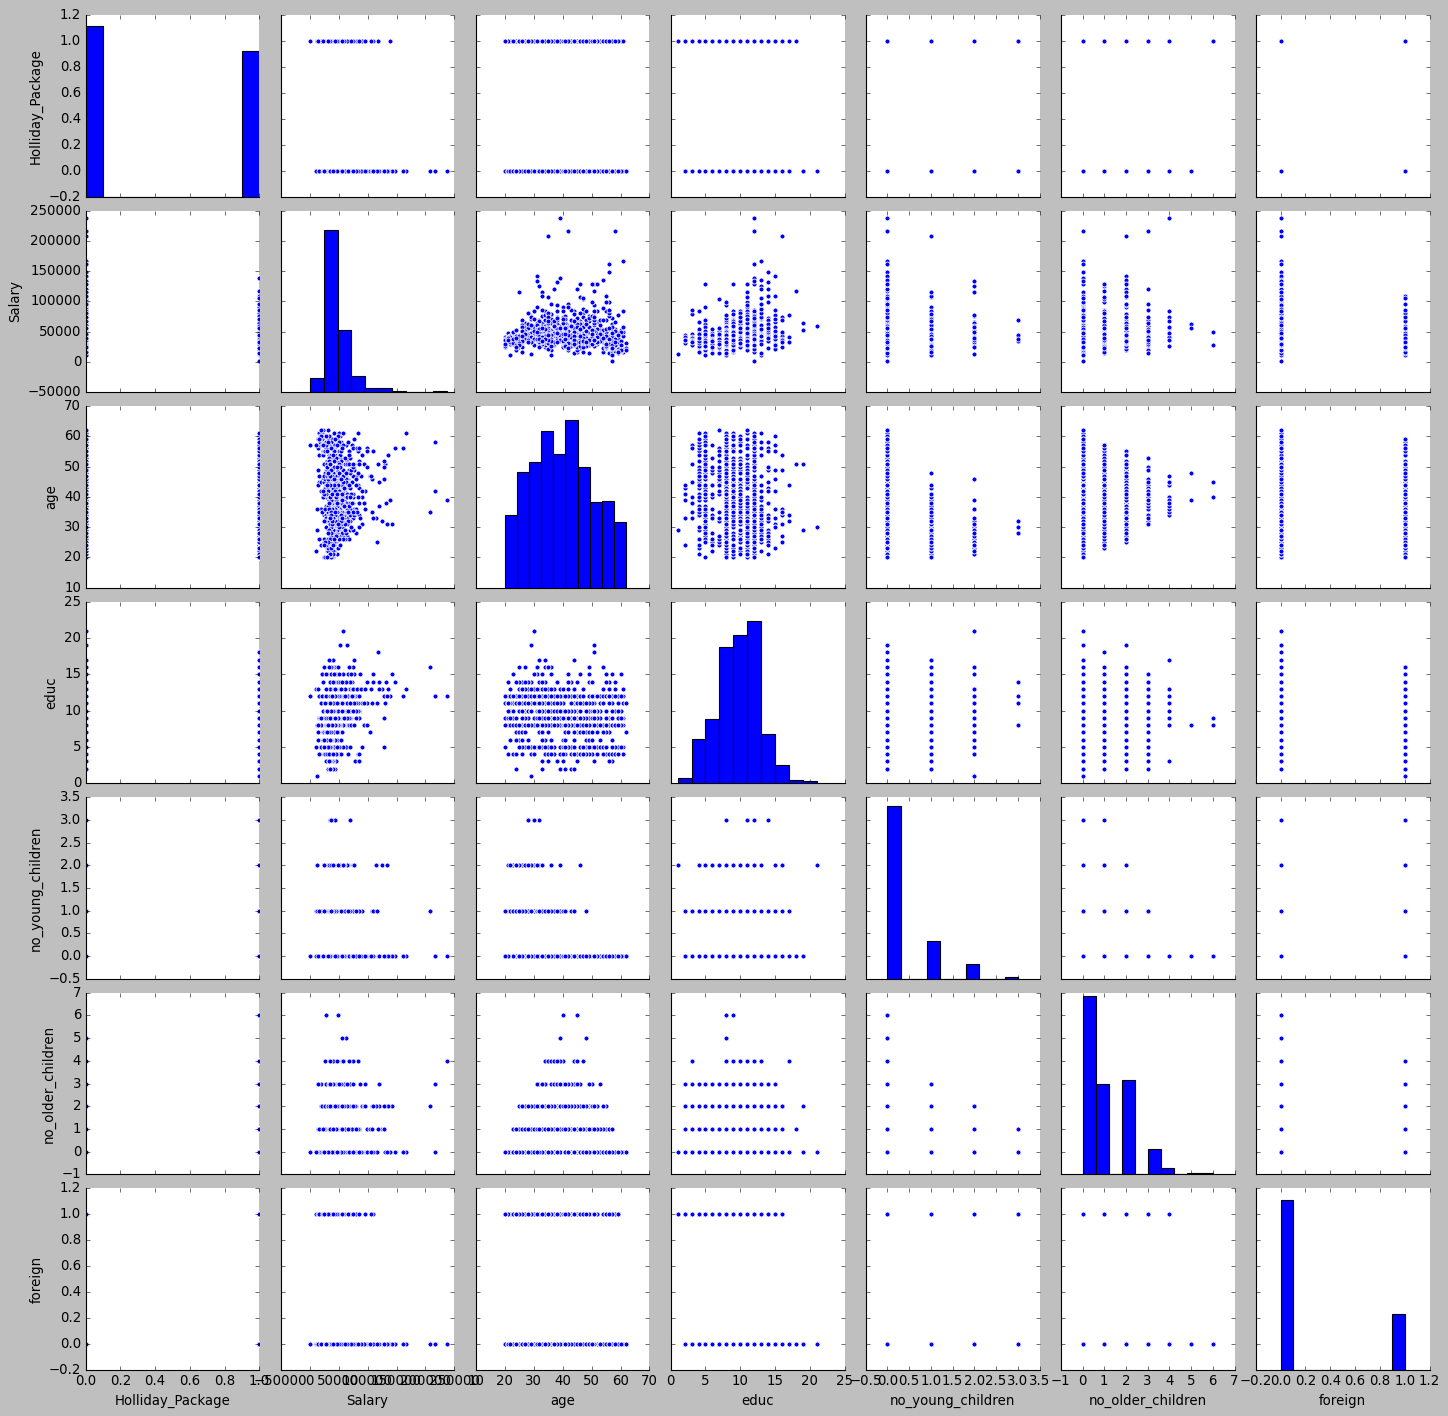

In [395]:
sns.pairplot(data)

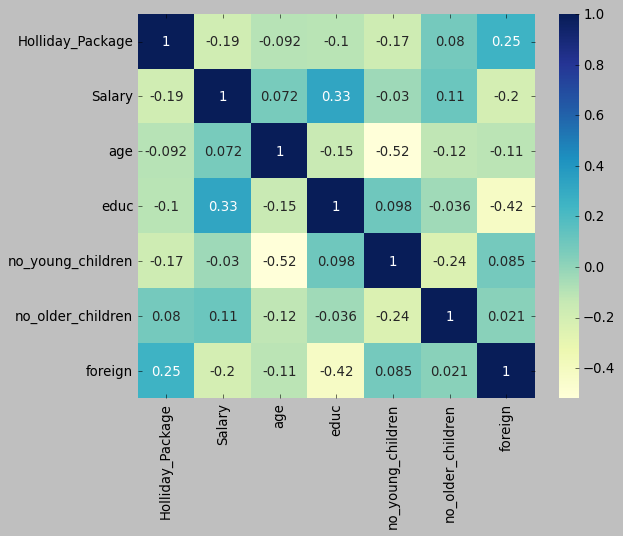

In [396]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

In [398]:
from sklearn.model_selection import train_test_split

In [399]:
from sklearn import metrics

In [400]:
from sklearn.linear_model import LogisticRegression


In [401]:
X = data.drop('Holliday_Package', axis=1)

y = data[['Holliday_Package']]

In [412]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [413]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.5305343511450382


C:\Users\Muthu B\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [440]:
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

[[129  16]
 [107  10]]
              precision    recall  f1-score   support

           0       0.55      0.89      0.68       145
           1       0.38      0.09      0.14       117

    accuracy                           0.53       262
   macro avg       0.47      0.49      0.41       262
weighted avg       0.47      0.53      0.44       262



In [441]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.55      0.89      0.68       145
           1       0.38      0.09      0.14       117

    accuracy                           0.53       262
   macro avg       0.47      0.49      0.41       262
weighted avg       0.47      0.53      0.44       262



AUC: 0.567


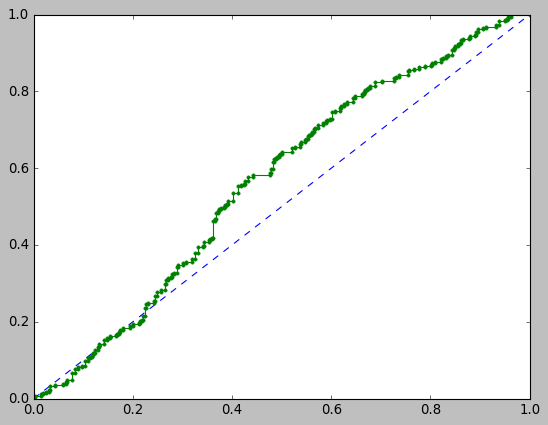

In [416]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.627


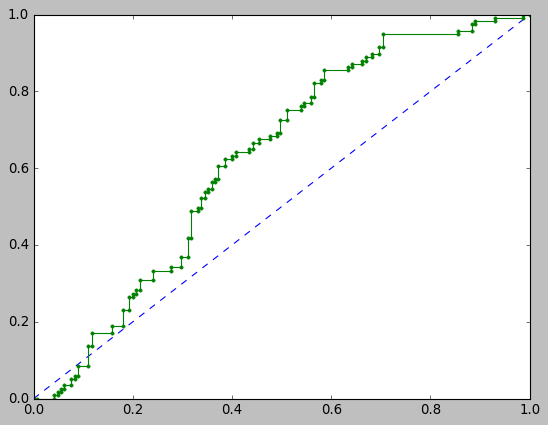

In [417]:
# AUC and ROC for the test data


# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [418]:
#LDA

In [419]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [430]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [431]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)
model

C:\Users\Muthu B\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [432]:
pred_class = model.predict(X)
data['Prediction'] = pred_class

In [438]:
from sklearn.metrics import classification_report
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       471
           1       0.66      0.54      0.60       401

    accuracy                           0.66       872
   macro avg       0.66      0.65      0.65       872
weighted avg       0.66      0.66      0.66       872



In [434]:
from sklearn.metrics import confusion_matrix

In [435]:
confusion_matrix(Y, pred_class)

array([[360, 111],
       [183, 218]], dtype=int64)

AUC: 0.740


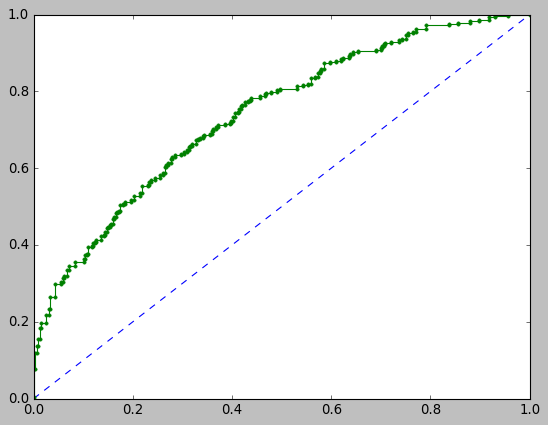

In [436]:
# AUC and ROC for the training data

# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.709


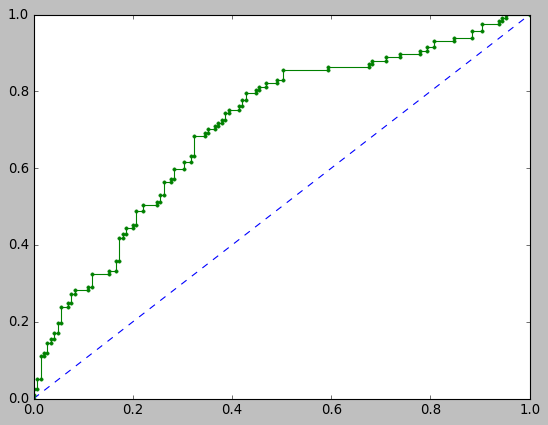

In [437]:
# AUC and ROC for the test data


# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()